# **<font color="red">Generalization: The goal of machine learning</font>**

## **<font color="blue">Underfitting and overfitting</font>**

### **<font color="blue">Noisy training data</font>**

### **<font color="blue">Ambiguous features</font>**

## **<font color="blue">Rare features and spurious correlations</font>**

### **<font color="blue">Adding white-noise channels or all-zeros channels to MNIST</font>**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

### **<font color="blue">Training the same model on MNIST data with noise channels or all-zero channels</font>**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 10ms/step - loss: 0.6121 - accuracy: 0.8124 - val_loss: 0.2817 - val_accuracy: 0.9140
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2533 - accuracy: 0.9219 - val_loss: 0.1830 - val_accuracy: 0.9431
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1637 - accuracy: 0.9492 - val_loss: 0.2133 - val_accuracy: 0.9386
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1172 - accuracy: 0.9636 - val_loss: 0.1246 - val_accuracy: 0.9637
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0845 - accuracy: 0.9725 - val_loss: 0.1342 - val_accuracy: 0.9600
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0624 - accuracy: 0.9805 - val_loss: 0.1682 - val_accuracy: 0.9519
Epoch 7/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.1222 - val_accuracy: 0.9669
Epoc

### **<font color="blue">Plotting a validation accuracy comparison</font>**

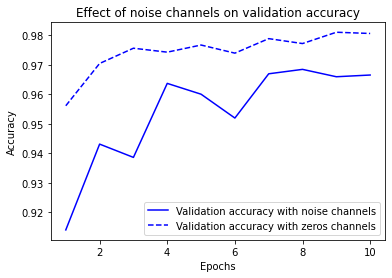

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

  # **<font color="red">The nature of generalization in deep learning</font>**

### **<font color="blue">Fitting a MNIST model with randomly shuffled labels</font>**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3173 - accuracy: 0.1031 - val_loss: 2.3076 - val_accuracy: 0.1071
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2997 - accuracy: 0.1177 - val_loss: 2.3123 - val_accuracy: 0.1037
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2901 - accuracy: 0.1287 - val_loss: 2.3289 - val_accuracy: 0.1010
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2764 - accuracy: 0.1418 - val_loss: 2.3301 - val_accuracy: 0.1009
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2595 - accuracy: 0.1550 - val_loss: 2.3419 - val_accuracy: 0.1018
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2377 - accuracy: 0.1694 - val_loss: 2.3544 - val_accuracy: 0.0981
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2148 - accuracy: 0.1816 - val_loss: 2.3661 - val_accuracy: 0.1043

# **<font color="red">Improving model fit</font>**

## **<font color="blue">Tuning key gradient descent parameters</font>**

### **<font color="blue">Training a MNIST model with an incorrectly high learning rate</font>**

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 804.7100 - accuracy: 0.3664 - val_loss: 2.5987 - val_accuracy: 0.2689
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 3.7121 - accuracy: 0.2483 - val_loss: 2.3449 - val_accuracy: 0.2263
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6865 - accuracy: 0.2137 - val_loss: 3.0833 - val_accuracy: 0.2702
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7910 - accuracy: 0.2843 - val_loss: 2.4652 - val_accuracy: 0.2173
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 3.1545 - accuracy: 0.2523 - val_loss: 2.4380 - val_accuracy: 0.2903
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.6909 - accuracy: 0.2579 - val_loss: 2.2995 - val_accuracy: 0.2506
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.9140 - accuracy: 0.2523 - val_loss: 2.0732 - val_accuracy: 0.2707
Epoc

### **<font color="blue">The same model with a more appropriate learning rate</font>**

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3451 - accuracy: 0.9137 - val_loss: 0.1877 - val_accuracy: 0.9566
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1422 - accuracy: 0.9636 - val_loss: 0.1537 - val_accuracy: 0.9658
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1149 - accuracy: 0.9735 - val_loss: 0.2436 - val_accuracy: 0.9605
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0980 - accuracy: 0.9783 - val_loss: 0.1891 - val_accuracy: 0.9699
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0893 - accuracy: 0.9812 - val_loss: 0.2155 - val_accuracy: 0.9714
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0799 - accuracy: 0.9843 - val_loss: 0.2139 - val_accuracy: 0.9712
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0676 - accuracy: 0.9864 - val_loss: 0.2421 - val_accuracy: 0.9713
Epoch 

### **<font color="black">Leveraging better architecture priors</font>**

# **<font color="red">Increasing model capacity</font>**

## **<font color="blue">A simple logistic regression on MNIST</font>**

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.8380 - val_loss: 0.3589 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.9035 - val_loss: 0.3084 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9120 - val_loss: 0.2903 - val_accuracy: 0.9206
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2991 - accuracy: 0.9160 - val_loss: 0.2807 - val_accuracy: 0.9222
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.9194 - val_loss: 0.2763 - val_accuracy: 0.9227
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9205 - val_loss: 0.2731 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9223 - val_loss: 0.2721 - val_accuracy: 0.9237
Epoch 

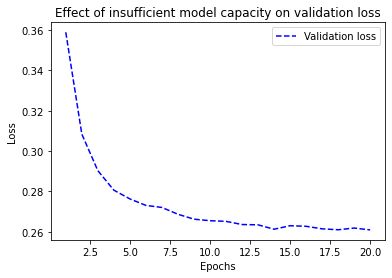

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3724 - accuracy: 0.8936 - val_loss: 0.1896 - val_accuracy: 0.9468
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1640 - accuracy: 0.9506 - val_loss: 0.1417 - val_accuracy: 0.9570
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1153 - accuracy: 0.9659 - val_loss: 0.1199 - val_accuracy: 0.9645
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9739 - val_loss: 0.1046 - val_accuracy: 0.9693
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.1068 - val_accuracy: 0.9703
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9825 - val_loss: 0.0945 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0985 - val_accuracy: 0.9721
Epoch 

# **<font color="red">Improving generalization: Dataset curation、Feature engineering、Using early stopping</font>**

## **<font color="blue">Regularizing your model</font>**

### **<font color="blue">Reducing the network's size</font>**

#### **<font color="blue">Original model</font>**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5397 - accuracy: 0.7837 - val_loss: 0.4132 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3341 - accuracy: 0.8986 - val_loss: 0.3376 - val_accuracy: 0.8710
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2419 - accuracy: 0.9237 - val_loss: 0.2861 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1883 - accuracy: 0.9407 - val_loss: 0.2724 - val_accuracy: 0.8929
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1547 - accuracy: 0.9497 - val_loss: 0.2767 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1239 - accuracy: 0.9599 - val_loss: 0.2915 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1011 - accuracy: 0.9707 - val_loss: 0.3535 - val_accuracy: 0.8713
Epoch 8/20
30

### **<font color="blue">Version of the model with lower capacity</font>**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5928 - accuracy: 0.7860 - val_loss: 0.5149 - val_accuracy: 0.8433
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4494 - accuracy: 0.8824 - val_loss: 0.4179 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3585 - accuracy: 0.9036 - val_loss: 0.3581 - val_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2947 - accuracy: 0.9167 - val_loss: 0.3210 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2486 - accuracy: 0.9262 - val_loss: 0.2972 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2146 - accuracy: 0.9360 - val_loss: 0.2833 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1886 - accuracy: 0.9422 - val_loss: 0.2745 - val_accuracy: 0.8932
Epoch 8/20
30

### **<font color="blue">Version of the model with higher capacity</font>**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 98ms/step - loss: 0.5418 - accuracy: 0.7557 - val_loss: 0.3254 - val_accuracy: 0.8723
Epoch 2/20
30/30 [==============================] - 3s 92ms/step - loss: 0.2491 - accuracy: 0.9016 - val_loss: 0.3938 - val_accuracy: 0.8320
Epoch 3/20
30/30 [==============================] - 3s 86ms/step - loss: 0.1567 - accuracy: 0.9425 - val_loss: 0.2990 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0709 - accuracy: 0.9764 - val_loss: 0.3834 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 3s 87ms/step - loss: 0.1112 - accuracy: 0.9799 - val_loss: 0.3574 - val_accuracy: 0.8919
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.4983 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 3s 88ms/step - loss: 4.6642e-04 - accuracy: 1.0000 - val_loss: 0.6309 - val_accuracy: 0.8885
Epoch 8/2

# **<font color="red">Adding weight regularization</font>**

### **<font color="blue">Adding L2 weight regularization to the model</font>**

In [16]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 23ms/step - loss: 0.5983 - accuracy: 0.7746 - val_loss: 0.4768 - val_accuracy: 0.8576
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4034 - accuracy: 0.8953 - val_loss: 0.3934 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3355 - accuracy: 0.9140 - val_loss: 0.3775 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3030 - accuracy: 0.9246 - val_loss: 0.3612 - val_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2845 - accuracy: 0.9299 - val_loss: 0.3763 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2709 - accuracy: 0.9367 - val_loss: 0.3658 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2598 - accuracy: 0.9411 - val_loss: 0.3756 - val_accuracy: 0.8804
Epoch 8/20
30

### **<font color="blue">Different weight regularizers available in Keras</font>**

In [17]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# **<font color="red">Adding dropout</font>**

### **<font color="blue">Adding dropout to the IMDB model</font>**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6274 - accuracy: 0.6643 - val_loss: 0.5309 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5083 - accuracy: 0.7803 - val_loss: 0.4251 - val_accuracy: 0.8666
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4221 - accuracy: 0.8352 - val_loss: 0.3500 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3646 - accuracy: 0.8618 - val_loss: 0.3136 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3135 - accuracy: 0.8863 - val_loss: 0.2928 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2751 - accuracy: 0.9055 - val_loss: 0.2845 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2495 - accuracy: 0.9141 - val_loss: 0.2720 - val_accuracy: 0.8942
Epoch 8/20
30